In [18]:
!git clone https://github.com/Taruna-07/drone.git

fatal: destination path 'drone' already exists and is not an empty directory.


In [17]:
import requests, zipfile, io
#The copied URL goes here ->
r = requests.get( 'https://github.com/Taruna-07/drone/blob/master/dataset.zip?raw=true' ) 
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_train=pd.read_csv("/content/drone/train_final.csv",index_col=False)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,255,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,255,255,255,255,255,255,255,205,64,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,104,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,60,0,0,0,0,0,11
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,77,77,140,178,178,133,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,77,77,77,178,178,178,77,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,91,237,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,237,127,0,...,0,0,0,0,0,0,0,0,0,0,0,255,164,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,32,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,167,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [3]:
labels=df_train["784"]

In [4]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,255,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,255,255,255,255,255,255,255,205,64,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,104,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,60,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,77,77,140,178,178,133,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,77,77,77,178,178,178,77,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,91,237,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,237,127,0,...,0,0,0,0,0,0,0,0,0,0,0,0,255,164,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,32,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,167,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
np.random.seed(1212) 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import keras 
from tensorflow.keras.models import Model 
from keras.layers import * 
from keras import optimizers 
from keras.layers import Input,Dense 
#from tensorflow.keras.model import Sequential 
from keras.layers import Dropout,Embedding 
from tensorflow.keras.layers import Flatten 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils 

In [37]:
labels=np.array(labels)

In [38]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [39]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,255,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,255,255,255,255,255,255,255,205,64,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,104,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,60,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,77,77,140,178,178,133,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,77,77,77,178,178,178,77,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,91,237,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,237,127,0,...,0,0,0,0,0,0,0,0,0,0,0,0,255,164,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,32,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,167,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
l=[]
for i in range(47372):
    l.append(np.array(df_train[i:i+1]).reshape(-1,28,28,1))

In [42]:
np.random.seed(7)

In [77]:
model= keras.models.Sequential()
model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(15,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(13,activation="softmax"))

In [83]:
model.compile(loss="categorical_cross_entropy",optimizer="adam",metrics=["accuracy"])

In [119]:
model.fit(np.array(1),cat,shuffle=True, epochs=3)

IndexError: ignored

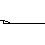

TypeError: ignored

In [133]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drone/dataset/-/-_121.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
cv2.waitKey(0)
#cv2_destroyALLWindows()
if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    contours=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #_,cnt=sorted(ctrs,key=lambda ctr:cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    rects=[]
    for c in contours:
        w,h=cv2.boundingRect(c)
        rect=[w,h]
        rects.append(rect)
    print("rects",rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(rec[0]+r[2]+10) and r[1]<(rec[1]+r[3]+10) and res[1]<(rec[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print("bools",bool_rect)
    dump_rect=[]
    for i in range (0,len(cnt)):
        for j in range (0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if (area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print("dump_rects",dump_rect)
    final_rects=[i for i in rects if i not in dump_rect]
    print("final_rects",final_rects)
    for r in final_rects:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop=thresh[y:y++h+10,x:x+w+10]
        im_resize=cv2.resize(im_crop,(28,28))
        cv2.imshow("work",im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        train_data.append(im_resize)

In [123]:
import cv2
import numpy as np
img = cv2.imread('/content/drone/dataset/-/-_121.jpg',cv2.IMREAD_GRAYSCALE)
#kernel = np.ones((3,3),np.uint8)
cv2_imshow(img)
cv2.waitKey(0)
#cv2.destroyAllWindows()
#erosion = cv2.erode(img,kernel,iterations = 3)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#img=dilation
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ret,ctrs=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #cnt=sorted(ctrs,key=lambda ctr:cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    #print(len(cnt))
    rects=[]
    #for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    #print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    #print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    #print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    #print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))
        cv2.imshow("work",im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize=np.reshape(im_resize,(1,28,28))
        train_data.append(im_resize)

IndentationError: ignored

In [ ]:
s=""
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=model.predictclasses(train_data[i])
    if (result[0]==10):
        s=s+"-"
    if (result[0]==11):
        s=s+"+"
    if (result[0]==12):
        s=s+"x"
    if (result[0]==1):
        s=s+"1"
    if (result[0]==2):
        s=s+"2"
    if (result[0]==3):
        s=s+"3"
    if (result[0]==4):
        s=s+"4"
    if (result[0]==5):
        s=s+"5"
    if (result[0]==6):
        s=s+"6"
    if (result[0]==7):
        s=s+"7"
    if (result[0]==8):
        s=s+"8"
    if (result[0]==9):
        s=s+"9"
print(s)

In [91]:
# importing pandas module
#import pandas as pd

# making data frame
data = pd.read_csv('/content/drone/train_final.csv')

# dataframe.size
size = data.size

# dataframe.shape
shape = data.shape

# dataframe.ndim
df_ndim = data.ndim

# series.ndim
#series_ndim = data["Salary"].ndim

# printing size and shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))

# printing ndim
print("ndim of dataframe = {}")
format(df_ndim)

print("Length of L:", len(data))
print("The index of the last element of L:", len(data)-1)


Size = 10205
Shape =(13, 785)
Shape[0] x Shape[1] = 10205
ndim of dataframe = {}
Length of L: 13
The index of the last element of L: 12
